# P411 - Assignment 3
Kristi Webb, Sept 18 2015

github k-a-webb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## Q1: Lag correlations of weather time series

**1** From the hourly time series at Deep Cove (`dc`), calculate the *lag correlation co-efficient* $\rho_{xx}(\tau)$ out to a lag of $\tau=30\ \mathrm{days}$ (Remember this data is hourly!).  (also remember to remove the mean of $dc$ before trying to do the calculations).  

Comment on the resulting plot.

<hr>

**lag correlation co-efficient**

\begin{equation}
    \rho_{xy}(\tau) = \frac{C_{xy}(\tau)}{\sigma_x\sigma_y}
\end{equation}

The lowest order statistic is the **lag auto-covariance** for comparing x with itself and the **lag covariance** for comparing x(t) with y(t):

\begin{align}
    C_{xx}(t,t+\tau) &= E\left[\left( x_k(t)-\mu_x(t) \right)\left( x_k(t+\tau)-\mu_x(t+\tau) \right) \right]\\
    C_{xy}(t,t+\tau) &= E\left[\left( x_k(t)-\mu_x(t) \right)\left( y_k(t+\tau)-\mu_y(t+\tau) \right) \right]
\end{align}

# Is it necessary to make > 0 at infinity?


In [3]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb = hourdata[1,:]
dcc = dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

Nt = len(dc)
t = np.arange(Nt) # [hours]
days = t/24
dc -= np.mean(dc)

In [4]:
def lag_corr_coeff(x,y,lags):
    c_xy=np.zeros_like(lags)
  
    for ind,tau in enumerate(lags):
        if tau<0:
            c_xy[ind]=np.mean(x[:tau]*y[-tau:])
        elif tau==0:
            c_xy[ind]=np.mean(x*y)
        else:
            c_xy[ind]=np.mean(x[:-tau]*y[tau:])
    return c_xy, c_xy/(np.std(x)*np.std(y))

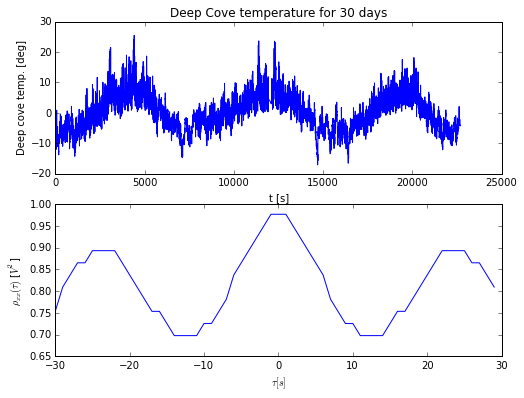

In [7]:
dc_30d = dc[:24*30*356] # One year's worth of data
t_30d = t[:24*30*356]

lags = range(-30,30) # the lags are integers
c_xx, rho_xx = lag_corr_coeff(dc_30d, dc_30d, lags)
tau = np.array(lags)*np.median(np.diff(t_30d))

fig,axs=plt.subplots(2,1,figsize=(8,6))

axs[0].plot(t_30d, dc_30d)
axs[0].set_xlabel('t [s]') ; axs[0].set_ylabel('Deep cove temp. [deg]')
axs[0].set_title('Deep Cove temperature for 30 days')

#axs[1].plot(tau, c_xx)    
axs[1].plot(tau, rho_xx)    
axs[1].set_xlabel(r'$\tau [s]$') ; axs[1].set_ylabel(r'$\rho_{xx}(\tau)$ [$V^2$]')
#axs[1].set_title('Lag auto-covariance of Deep Cove temperature for 30 days')

plt.show()

<hr>
*2* Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer).  Make sure to indicate which lag correlation is which on the plots.

Comment below on the different charcter of these two lag correlations.
<hr>

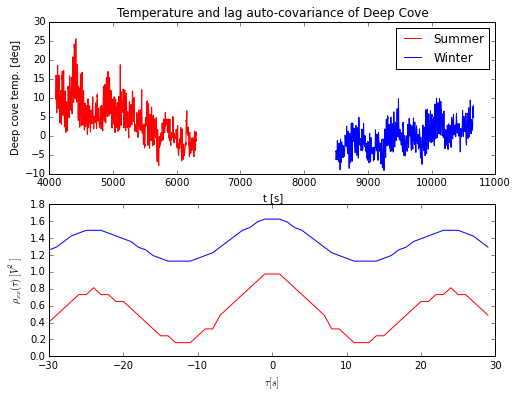

In [10]:
# Temperature data begins Jan. 1st

days_to_summer = 31 + 28 + 31 + 30 + 31 + 20  # Summer begins June 20th
days_end_summer = days_to_summer + 92  # last day of summer Sept 20th
days_to_winter = days_end_summer + 10 + 31 + 30 + 20  # Winter begins December 22nd
days_end_winter = days_to_winter + 11 + 31 + 28 + 20  # last day of winter Mar 20th

dc_summer = dc[24*days_to_summer:24*days_end_summer]
t_summer = t[24*days_to_summer:24*days_end_summer]
dc_winter = dc[24*days_to_winter:24*days_end_winter]
t_winter = t[24*days_to_winter:24*days_end_winter]

lags = range(-30,30) # the lags are integers
tau_summer = np.array(lags)*np.median(np.diff(t_summer))
c_xx_summer, rho_xx_summer = lag_corr_coeff(dc_summer, dc_summer, lags)

tau_winter = np.array(lags)*np.median(np.diff(t_winter))
c_xx_winter, rho_xx_winter = lag_corr_coeff(dc_winter, dc_winter, lags)

fig,axs=plt.subplots(2,1,figsize=(8,6))

axs[0].plot(t_summer, dc_summer, '-r', label="Summer")
axs[0].plot(t_winter, dc_winter, '-b', label="Winter")
axs[0].set_xlabel('t [s]') ; axs[0].set_ylabel('Deep cove temp. [deg]')
axs[0].legend()

axs[1].plot(tau_summer, rho_xx_summer, '-b', label="Summer")
axs[1].plot(tau_winter, rho_xx_winter, '-r', label="Winter")
axs[1].set_xlabel(r'$\tau [s]$') ; axs[1].set_ylabel(r'$\rho_{xx}(\tau)\ [V^2]$')

axs[0].set_title('Temperature and lag auto-covariance of Deep Cove') ; plt.show()

<font color='red'>
# Comment below on the different charcter of these two lag correlations.

## Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.

**1** Consider the process $x(t) = \int_{t-b}^t y(t) \ \mathrm{dt}$ where $y(t)$ is uncorrelated white noise so that $R_{yy}(\tau)=\delta(\tau)$.  Using the definition of $R_{xx}(\tau)$, and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function: 

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}
<hr>

\begin{equation}
    R_{xx}(\tau) 
     = E\left[x(t) \ x(t+\tau) \right] \\
     = E\left[\int_{t-b}^t y(t) \ \mathrm{dt} \ * \ \int_{t+\tau-b}^{t+\tau} y(t+\tau) \ \mathrm{d \tau}\right] \\
     = E \left[\int_{t-b}^t \int_{t+\tau-b}^{t+\tau} y(t) \ y(t+\tau) \  \mathrm{d \tau} \mathrm{dt} \right]  \\
\end{equation}

Since E is a linear operator:

\begin{equation}     
     = \int_{t-b}^t \int_{t+\tau-b}^{t+\tau} \ E\left[ y(t) \ y(t+\tau) \right] \ \mathrm{d \tau} \ \mathrm{dt}  \\
\end{equation}

From the definition of $R_{yy}$:

\begin{equation}
    R_{yy}(\tau)=
    \begin{cases}
        \tau & \tau \neq 0\\
        \infty & \tau = 0
    \end{cases}
\end{equation}

\begin{equation}     
     R_{xx} = \int_{t-b}^t \int_{t+\tau-b}^{t+\tau} \ \delta(\tau) \ \mathrm{d \tau} \ \mathrm{dt}  \\
\end{equation}

We now consider the bounds of integration of the inside integral (i.e. over d$\tau$)

for $\tau \geq b$ (or similarly $\tau \leq -b$ : 

\begin{equation}     
     \int_{t+\tau-b}^{t+\tau} \ \delta(\tau) \ \mathrm{d \tau} \ \rightarrow \ 0 \\
\end{equation}

for $0 < \tau \leq b$: 

\begin{equation}     
     \int_{t+\tau-b}^{t+\tau} \ \delta(\tau) \ \mathrm{d \tau} \ \rightarrow \ 1 \\
\end{equation}

Now considering the outside integral, we can simplify by changing the bounds:

\begin{equation}     
     t \ \rightarrow \ b - |\tau| \\
     t - b \ \rightarrow \ 0
\end{equation}

\begin{equation}     
     \int_{0}^{b - |\tau|} \ 1 \ \mathrm{dt} = b - |\tau| \\
\end{equation}

This gives us the expected result, where the result is a triangle function:

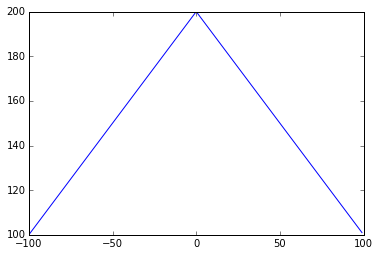

In [19]:
t = 100 ; b = 200
tt = np.arange(-t,t)
plt.plot(tt, b - np.abs(tt))

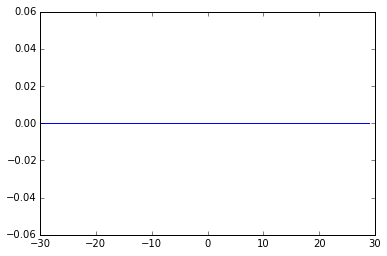

In [12]:

lags = range(-30,30) # the lags are integers

#plt.plot(tt, b - np.abs(tt))

def lag_corr(x, lag):
    Rxx = np.zeros(len(lags))
    for num,lag in enumerate(lags):
        if lag>0:
            Rxx[num]= np.mean(x[lag:]*x[:-lag] )
        elif lag<0:
            Rxx[num]= np.mean(x[-lag:]*x[:lag] )
        else:
            Rxx[num]= np.mean(x*x)
    return Rxx

R_xx = lag_corr(x, lags)
plt.plot(lags, R_xx)


<hr>
**2** Show emperically that you have the right *lag auto correlation* by computing the lag correlation of a random discrete timeseries $x(t)$. 

Hint: have a look at `np.convolve` to do the integration. 

Hint 2: Make sure your time series is long enough to get a nice representation of $R_{xx}(\tau)$.  Show what happens if N is too small and what happens if it gets larger. To do this well,  I used `N in [500, 5000, 50000, 5e6]`, but my machine has a good amount of memory.  Don't *test* on the bigger values, as it is slow, just add them for the final product!
<hr>

<hr>
**3** Derive (or look up) $S_{xx}(f)$ of this process:
<hr>

<hr>
**4** Demonstrate with finite values of $T$ that $\lim_{T->\infty}S_{xx}(f,T) = S_{xx}(f)$ does *not* converge to $S_{xx}(f)$.  Do this by taking longer values of $T$, fitting to the same set of $f$, and graphically showing that the spectral estimate does not improve.  (Do **not** use canned `fft` routines, unless you prove they work first.)

Hints: 
  - When you choose your discrete values of $f$, make sure you don't choose them to be too high (i.e. if you define $\Delta t=1 \ \mathrm{s}$ in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
  - I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code.  To do this, you would do something like:

```python
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on
    
    # Your code in here
    return X # where X is your Fourier tranform
```

  - Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
  - use `ax.loglog(f,X)` to make your plots.  We almost always plot spectra using `loglog`.


<hr>

<hr>
**5** Now demonstrate that the *expected value* of 

$$E\left[\lim_{T->\infty}S_{xx}(f,T)\right]$$ 

approaches $S_{xx}(f)$ by *averaging* a number of your moderate lengthed spectral estimates together.  Comment on the form of the spectrum relative to how you made the timeseries.

Hints:
  
  - Just do what you did above, but average the results of `navg` non-overlapping segments of data.  
  - This gets computationally expensive, I did `navg` of `1, 5, 50, 100` and got nice results.  Test your code on just `navg` of `1` and `5`, and when its working add the higher numbers.
 <hr>